In [77]:
import numpy as np
import matplotlib.pyplot as ax

Time to reach goal: 31.1 seconds


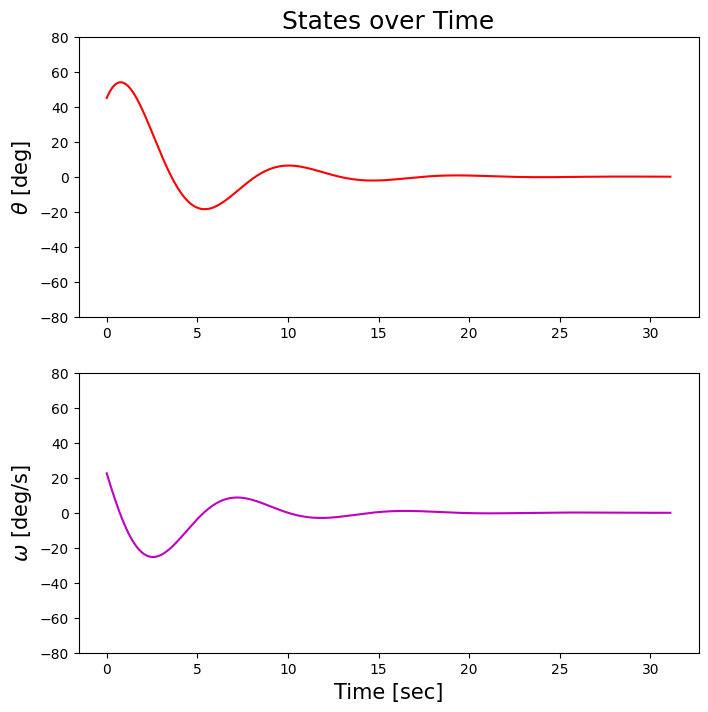

In [90]:
# Moment of Inertia
I = 10000

# FSFB GAINS
k1 = 500
k2 = 0.05

# INITIAL CONDITION
theta_0 = np.pi/4 # rad
omega_0 = np.pi/8 # rad/sec

# define / initialize error
# this is not used to 
err = abs(theta_0) + abs(omega_0)

# initialize time and interval tracker
t = np.array([0])
dt = 0.1
i = 0

# initialize the states
theta = np.array([theta_0])
omega = np.array([omega_0])


# main()

while  err > 0.001:

    # calculate next state
    next_theta = theta[i] + omega[i]*dt
    next_omega = omega[i] + (-k1/I*theta[i] -k2*omega[i])

    # add next state to array
    theta = np.append(theta, next_theta)
    omega = np.append(omega, next_omega)

    err = abs(theta[i]) + abs(omega[i])
    
    # next interval (i=0 is initial condition)
    t = np.append(t, t[i]+dt)
    i += 1

    if t[i] > 1000:
        print("It took too long!")
        break

print(f"Time to reach goal: {round(t[i], 4)} seconds")
# print(f"Actuator effort spent {effort} Nm")

# convert RAD & RAD/S --> DEG & DEG/S for plots
theta_deg = theta*360/(2*np.pi)
omega_deg_s = omega*360/(2*np.pi)

# plot states over time
fig, ax = plt.subplots(2, 1, figsize=[8,8])

for axis in ax:
    axis.set_ylim([-80, 80])

ax[0].plot(t, theta_deg, 'r')
ax[0].set_title("States over Time", fontsize=18)
ax[0].set_ylabel(r"$\theta$ [deg]", fontsize=15)

ax[1].plot(t, omega_deg_s, 'm')
ax[1].set_title
ax[1].set_ylabel(r"$\omega$ [deg/s]", fontsize=15)
ax[1].set_xlabel("Time [sec]", fontsize=15)

fig.savefig("figs/states_time")



In [85]:
# System dynamics / How the states affect eachother

A = np.array([  [0, dt],
                [0, 0]
            ])

# Effect of controller input (u) on states
B = np.array([  [0],
                [dt/I]
            ])

K = np.array([-k1, -k2])

Acl = A-(B*K)

np.linalg.eig(Acl)

EigResult(eigenvalues=array([-0.02235818,  0.02236318]), eigenvectors=array([[-0.97590527, -0.97589488],
       [ 0.21819466, -0.21824113]]))

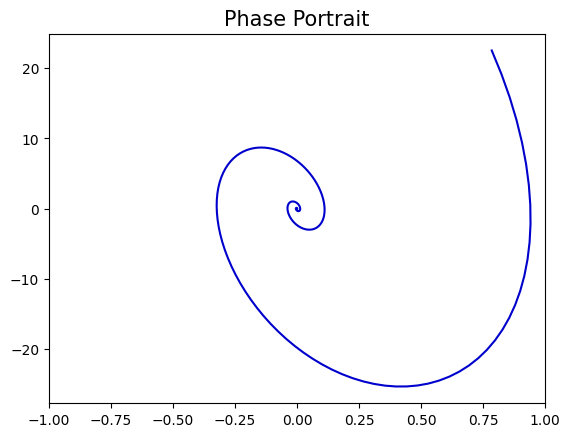

In [80]:
fig, ax = plt.subplots(1)

ax.set_title("Phase Portrait", fontsize=15)
ax.set_xlim([-1, 1])
ax.plot(theta, omega_deg_s, color='mediumblue')

# # Move left y-axis and bottom x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')

# # Eliminate upper and right axes
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')

# # Show ticks in the left and lower axes only
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

fig.savefig("figs/phase_portrait")